In [ ]:
from IPython.display import HTML, display

display(HTML('''
<div style="background-color: lightgreen; padding:15px; border-radius:10px;">
✅ Esta celda tiene fondo verde solo aquí
</div>
'''))


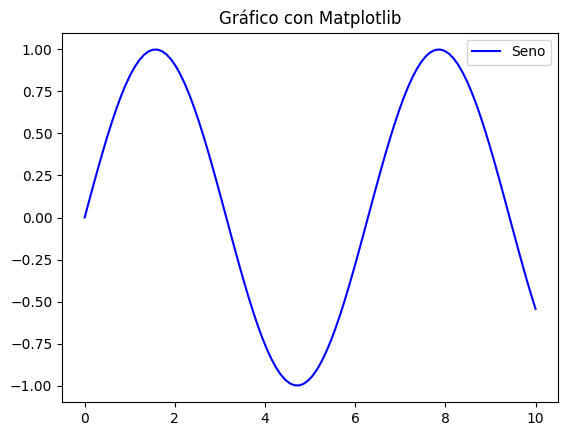

In [ ]:
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
from bokeh.plotting import figure, output_notebook, show
from bokeh.io import output_notebook
from bokeh.io import push_notebook

# Necesario para que Bokeh funcione en Colab
output_notebook()

# ------------------------------
# Gráfico con Matplotlib
# ------------------------------
x = np.linspace(0, 10, 100)
y = np.sin(x)

fig, ax = plt.subplots()
ax.plot(x, y, color="blue", label="Seno")
ax.set_title("Gráfico con Matplotlib")
ax.legend()

# Contenido Matplotlib (se muestra con widgets.Output)
out1 = widgets.Output()
with out1:
    display(fig)

# ------------------------------
# Gráfico con Bokeh
# ------------------------------
p = figure(title="Gráfico con Bokeh", x_axis_label="x", y_axis_label="y", width=400, height=300)
p.line(x, y, line_width=2, color="green", legend_label="Seno")

out2 = widgets.Output()
with out2:
    show(p, notebook_handle=True)

# ------------------------------
# Tabs con ipywidgets
# ------------------------------
tab = widgets.Tab(children=[out1, out2])
tab.set_title(0, "Matplotlib")
tab.set_title(1, "Bokeh")

display(tab)


In [12]:
import ipywidgets as widgets
from IPython.display import display, clear_output

casilla = widgets.Checkbox(
    value=False,                # Estado inicial
    description='Mi casilla',   # Texto que aparece junto a la casilla
    disabled=False,
    indent=True
)

def evento_casilla(change):
    clear_output(wait=True)   # Limpia la salida
    display(casilla)          # Vuelve a mostrar la casilla

    if change['new']:
        print("✅ Casilla marcada")
    else:
        print("❌ Casilla desmarcada")

casilla.observe(evento_casilla, names='value')
display(casilla)


Checkbox(value=False, description='Mi casilla')

❌ Casilla desmarcada


In [ ]:
from IPython.display import display, HTML

# Lista de archivos simulada
archivos = [
    "reporte_2025.csv",
    "imagen_mareografica.png",
    "datos_sensores.txt",
    "grafica_resultados.pdf"
]

# Crear un contenedor para cada archivo
for archivo in archivos:
    html = f"""
    <div style="
        width:1080px; height:300px;
        border:2px solid #2D6FA4;
        border-radius:10px;
        margin:10px;
        display:flex;
        align-items:center;
        justify-content:center;
        background-color:#F4F9FF;
        font-family:Arial;
        font-size:14px;
        font-weight:bold;
        color:#2D6FA4;">
        📄 {archivo}
    </div>
    """
    display(HTML(html))


In [ ]:
from IPython.display import display, HTML

archivos = [
    "reporte_2025.csv",
    "imagen_mareografica.png",
    "datos_sensores.txt",
    "grafica_resultados.pdf"
]

for archivo in archivos:
    mensajes = []

    if archivo.endswith(".csv"):
        mensajes = ["Cargando CSV...", "Validando estructura...", "Limpiando datos...", "Generando salida...", "✅ CSV procesado"]

    elif archivo.endswith(".png"):
        mensajes = ["Cargando imagen...", "Aplicando filtros...", "Corrigiendo colores...", "Guardando copia...", "✅ Imagen lista"]

    elif archivo.endswith(".txt"):
        mensajes = ["Leyendo TXT...", "Buscando errores...", "Transformando datos...", "Escribiendo nuevo archivo...", "✅ Texto procesado"]

    else:
        mensajes = ["Generando archivo...", "Agregando contenido...", "Insertando gráficos...", "Guardando PDF...", "✅ Documento creado"]

    bloque_texto = "<br>".join(mensajes)

    html = f"""
    <div style="
        width:300px; height:160px;
        border:2px solid #2D6FA4;
        border-radius:10px;
        margin:10px;
        padding:10px;
        background-color:#F4F9FF;
        font-family:Courier New, monospace;
        font-size:13px;
        color:#2D6FA4;
        overflow:auto;">
        <b>📄 {archivo}</b><br><hr>
        {bloque_texto}
    </div>
    """
    display(HTML(html))


In [ ]:
import ipywidgets as widgets
from bokeh.plotting import figure
from bokeh.embed import components
from bokeh.resources import CDN
from IPython.display import display, HTML
import numpy as np

# Lista global donde se guardan los archivos seleccionados
archivos_seleccionados = []

archivos = [
    "reporte_2025.csv",
    "imagen_mareografica.png",
    "datos_sensores.txt",
    "grafica_resultados.pdf"
]

# Lista para guardar todos los checkboxes individuales
checkboxes_individuales = []

# Checkbox "Seleccionar todo"
seleccionar_todo = widgets.Checkbox(
    value=False,
    description="Seleccionar todo",
    indent=False
)

# Función que marca/desmarca todos los checkboxes individuales
def on_seleccionar_todo(change):
    for cb in checkboxes_individuales:
        cb.value = change['new']

seleccionar_todo.observe(on_seleccionar_todo, names='value')
display(seleccionar_todo)

# Crear contenedores por archivo
for archivo in archivos:
    # Mensajes según tipo
    if archivo.endswith(".csv"):
        mensajes = ["Cargando CSV...", "Validando estructura...", "Limpiando datos...", "Generando salida...", "✅ CSV procesado"]
    elif archivo.endswith(".png"):
        mensajes = ["Cargando imagen...", "Aplicando filtros...", "Corrigiendo colores...", "Guardando copia...", "✅ Imagen lista"]
    elif archivo.endswith(".txt"):
        mensajes = ["Leyendo TXT...", "Buscando errores...", "Transformando datos...", "Escribiendo nuevo archivo...", "✅ Texto procesado"]
    else:
        mensajes = ["Generando archivo...", "Agregando contenido...", "Insertando gráficos...", "Guardando PDF...", "✅ Documento creado"]

    bloque_texto = "<br>".join(mensajes)

    # Crear gráfico Bokeh
    x = np.linspace(0, 10, 50)
    y = np.sin(x) + np.random.random(50)*0.1
    p = figure(width=350, height=160, title="Gráfico")
    p.line(x, y, line_width=2, color="green")

    # Obtener componentes HTML de Bokeh
    script, div = components(p)
    recursos = CDN.render()

    # Crear checkbox individual
    checkbox = widgets.Checkbox(value=False, description="Seleccionar", indent=False)
    checkboxes_individuales.append(checkbox)

    # Función para actualizar la lista de archivos seleccionados
    def on_change(change, archivo=archivo):
        if change['new']:
            if archivo not in archivos_seleccionados:
                archivos_seleccionados.append(archivo)
        else:
            if archivo in archivos_seleccionados:
                archivos_seleccionados.remove(archivo)
        print("Archivos seleccionados:", archivos_seleccionados)

    checkbox.observe(on_change, names='value')

    # Contenedor HTML para gráfico + mensajes
    html_contenedor = f"""
    <div style="
        display:flex;
        border:2px solid #2D6FA4;
        border-radius:10px;
        margin:5px;
        padding:10px;
        background-color:#F4F9FF;
        width:700px;
        height:160px;
    ">
        <!-- Gráfico Bokeh -->
        <div style="flex:0 0 260px; margin-right:20px;">
            {div}
        </div>

        <!-- Mensajes -->
        <div style="flex:1; font-family:Courier New, monospace; font-size:13px; color:#2D6FA4; overflow:auto;">
            <b>📄 {archivo}</b><br><hr>
            {bloque_texto}
        </div>
    </div>
    """

    # Combinar checkbox + contenedor HTML en HBox
    contenedor_final = widgets.HBox([ widgets.HTML(value=recursos + html_contenedor + script)])
    display(contenedor_final)


Checkbox(value=False, description='Seleccionar todo', indent=False)

Archivos seleccionados: ['reporte_2025.csv']
Archivos seleccionados: ['reporte_2025.csv', 'imagen_mareografica.png']
Archivos seleccionados: ['reporte_2025.csv', 'imagen_mareografica.png', 'datos_sensores.txt']
Archivos seleccionados: ['reporte_2025.csv', 'imagen_mareografica.png', 'datos_sensores.txt', 'grafica_resultados.pdf']
Archivos seleccionados: ['imagen_mareografica.png', 'datos_sensores.txt', 'grafica_resultados.pdf']
Archivos seleccionados: ['datos_sensores.txt', 'grafica_resultados.pdf']
Archivos seleccionados: ['grafica_resultados.pdf']
Archivos seleccionados: []
Archivos seleccionados: ['reporte_2025.csv']
Archivos seleccionados: ['reporte_2025.csv', 'imagen_mareografica.png']
Archivos seleccionados: ['reporte_2025.csv', 'imagen_mareografica.png', 'datos_sensores.txt']
Archivos seleccionados: ['reporte_2025.csv', 'imagen_mareografica.png', 'datos_sensores.txt', 'grafica_resultados.pdf']
Archivos seleccionados: ['imagen_mareografica.png', 'datos_sensores.txt', 'grafica_resu

In [ ]:
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource, CustomJS, Div
from bokeh.layouts import column
import numpy as np

# Datos de ejemplo
x = np.array([1, 2, 3, 4, 5])
y = np.array([10, 20, 30, 25, 15])

source_data = ColumnDataSource(data=dict(x=x, y=y))
source_ball = ColumnDataSource(data=dict(x=[x[0]], y=[y[0]]))  # bolita roja

# Div para mostrar datos
data_display = Div(text=f"X: {x[0]}, Y: {y[0]}", width=200, height=30)

# Figura
p = figure(title="Bolita sigue los datos y muestra valores", x_range=(0,6), y_range=(0,35), width=600, height=400)
p.circle('x', 'y', size=10, source=source_data, color="blue", legend_label="Datos")
p.circle('x', 'y', size=15, source=source_ball, color="red", legend_label="Bolita")

# CustomJS para mover la bolita y actualizar el Div
callback_move = CustomJS(args=dict(source_ball=source_ball, source_data=source_data, display=data_display), code="""
    const data = source_data.data;
    const ball = source_ball.data;
    const mouseX = cb_obj.x;

    // Encontrar el índice del punto más cercano en X
    let distances = data['x'].map(xi => Math.abs(xi - mouseX));
    let min_index = distances.indexOf(Math.min(...distances));

    // Mover la bolita a ese punto
    ball['x'][0] = data['x'][min_index];
    ball['y'][0] = data['y'][min_index];

    // Actualizar el Div con los valores
    display.text = `X: ${data['x'][min_index]}, Y: ${data['y'][min_index]}`;

    source_ball.change.emit();
""")

# Conectar movimiento del mouse
p.js_on_event('mousemove', callback_move)

# Mostrar gráfico y Div
show(column(p, data_display))


In [ ]:
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource, CustomJS, Div, Panel, Tabs
import pandas as pd

# Datos de ejemplo
df = pd.DataFrame({
    'Date': pd.date_range('2025-08-19', periods=5, freq='D'),
    'Promedio': [10, 20, 30, 25, 15]
})

source2 = ColumnDataSource(data=dict(
    x=pd.to_datetime(df['Date']),
    y=df['Promedio']),
)

source_ball = ColumnDataSource(data=dict(
    x=[df['Date'].iloc[0]],
    y=[df['Promedio'].iloc[0]]
))

# Crear la figura
p = figure(title="Bolita sobre datos", x_axis_type='datetime', width=800, height=400)
p.circle('x', 'y', source=source2, color="blue", size=10)
p.circle('x', 'y', source=source_ball, color="red", size=15)

# Crear tablas de ejemplo como Divs (pueden ser DataTables)
tablas = []
for i in range(len(df)):
    tablas.append(Div(text=f"Tabla {i+1}"))  # reemplaza con tus tablas reales

# Inicialmente solo mostrar la primera
for i, t in enumerate(tablas):
    t.visible = (i == 0)

# Callback para mover la bolita y actualizar la tabla visible
callback_move = CustomJS(args=dict(
    source_ball=source_ball,
    source_data=source2,
    tablas=tablas
), code="""
    const data = source_data.data;
    const ball = source_ball.data;
    const mouseX = cb_obj.x;

    // Encontrar el índice del punto más cercano
    let distances = data['x'].map(xi => Math.abs(xi - mouseX));
    let min_index = distances.indexOf(Math.min(...distances));

    // Mover la bolita
    ball['x'][0] = data['x'][min_index];
    ball['y'][0] = data['y'][min_index];

    // Actualizar visibilidad de tablas
    for(let i=0; i<tablas.length; i++){
        tablas[i].visible = (i === min_index);
    }

    source_ball.change.emit();
""")

p.js_on_event('mousemove', callback_move)

# Mostrar figura y tablas
from bokeh.layouts import column
show(column(p, *tablas))


In [1]:
from google.colab import files
import zipfile
import os
from google.colab import files

# Subir archivos desde tu PC
uploaded = files.upload()

# Crear un ZIP con los archivos subidos
zip_filename = "mis_archivos.zip"
with zipfile.ZipFile(zip_filename, 'w') as zipf:
    for nombre in uploaded.keys():
        zipf.write(nombre)

# Descargar el ZIP
files.download(zip_filename)

Saving h316a56.dat to h316a56.dat
Saving h316a57.dat to h316a57.dat
Saving h316a58.dat to h316a58.dat
Saving h316a59.dat to h316a59.dat


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [3]:
import zipfile
import os
import ipywidgets as widgets
from IPython.display import display
from google.colab import files

# Lista de archivos seleccionados
archivos_seleccionados = ['/content/h316a52.dat']

# Mostrar mensaje con los archivos que se van a convertir
mensaje = "Estos son los archivos que convertiremos:<br>" + "<br>".join(archivos_seleccionados)
salida = widgets.HTML(value=mensaje)
display(salida)

# Botón para crear y descargar ZIP
def descargar_zip(b):
    zip_filename = "mis_archivos.zip"
    with zipfile.ZipFile(zip_filename, 'w') as zipf:
        for archivo in archivos_seleccionados:
            if os.path.exists(archivo):
                zipf.write(archivo, os.path.basename(archivo))  # guarda solo el nombre base
            else:
                print(f"⚠️ No se encontró: {archivo}")

    files.download(zip_filename)

boton_descargar = widgets.Button(description="📦 Descargar ZIP", button_style='success')
boton_descargar.on_click(descargar_zip)
display(boton_descargar)


HTML(value='Estos son los archivos que convertiremos:<br>/content/h316a52.dat')

Button(button_style='success', description='📦 Descargar ZIP', style=ButtonStyle())

⚠️ No se encontró: /content/h316a52.dat


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!pip install --upgrade bokeh


In [ ]:
from math import pi, log, tan
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, HoverTool, WMTSTileSource

output_notebook()

# --- Conversión lat/lon a WebMercator
R = 6378137
def lonlat_to_mercator(lon, lat):
    x = lon * (pi/180) * R
    y = R * log(tan((pi/4) + (lat*pi/360)))
    return x, y

# --- Estaciones mareográficas (aproximadas)
estaciones = [
    # Pacífico
    {"nombre": "La Paz", "lat": 24.142, "lon": -110.310},
    {"nombre": "Mazatlán", "lat": 23.216, "lon": -106.420},
    {"nombre": "Puerto Vallarta", "lat": 20.653, "lon": -105.225},
    {"nombre": "Manzanillo", "lat": 19.053, "lon": -104.316},
    {"nombre": "Lázaro Cárdenas", "lat": 17.958, "lon": -102.198},
    {"nombre": "Zihuatanejo", "lat": 17.635, "lon": -101.550},
    {"nombre": "Acapulco", "lat": 16.863, "lon": -99.882},
    {"nombre": "Puerto Ángel", "lat": 15.670, "lon": -96.495},
    {"nombre": "Huatulco", "lat": 15.768, "lon": -96.122},
    {"nombre": "Salina Cruz", "lat": 16.176, "lon": -95.198},
    {"nombre": "Puerto Chiapas", "lat": 14.708, "lon": -92.403},

    # Golfo / Caribe
    {"nombre": "Tuxpan", "lat": 20.950, "lon": -97.400},
    {"nombre": "Veracruz", "lat": 19.200, "lon": -96.133},
    {"nombre": "Alvarado", "lat": 18.780, "lon": -95.766},
    {"nombre": "Sánchez Magallanes", "lat": 18.000, "lon": -93.850},
    {"nombre": "Río Grijalva", "lat": 18.400, "lon": -93.183},
    {"nombre": "Frontera", "lat": 18.533, "lon": -92.650},
    {"nombre": "Ciudad del Carmen", "lat": 18.633, "lon": -91.833},
    {"nombre": "Lerma", "lat": 19.850, "lon": -90.533},
    {"nombre": "Celestún", "lat": 20.867, "lon": -90.400},
    {"nombre": "Sisal", "lat": 21.166, "lon": -90.033},
    {"nombre": "Progreso", "lat": 21.283, "lon": -89.667},
    {"nombre": "Telchac", "lat": 21.350, "lon": -89.283},
    {"nombre": "Isla Mujeres", "lat": 21.233, "lon": -86.733},
    {"nombre": "Puerto Morelos", "lat": 20.850, "lon": -86.883},
    {"nombre": "Sian Ka’an", "lat": 19.333, "lon": -87.433},
]

# --- Convertir todas a Mercator
xs, ys, nombres = [], [], []
for est in estaciones:
    x, y = lonlat_to_mercator(est["lon"], est["lat"])
    xs.append(x); ys.append(y); nombres.append(est["nombre"])

source = ColumnDataSource(dict(x=xs, y=ys, nombre=nombres))

# --- Crear figura
tile_provider = WMTSTileSource(
    url="http://a.basemaps.cartocdn.com/light_all/{z}/{x}/{y}.png"
)

p = figure(
    x_axis_type="mercator", y_axis_type="mercator",
    width=900, height=600,
    title="Estaciones Mareográficas UNAM (aprox.)"
)
p.add_tile(tile_provider)

# --- Marcadores
r = p.circle(x="x", y="y", size=10, source=source, color="blue", alpha=0.8)

# --- Hover para mostrar nombre
hover = HoverTool(tooltips=[("Estación", "@nombre")], renderers=[r])
p.add_tools(hover)

# Mostrar mapa
show(p)


In [2]:
import ipywidgets as widgets
from bokeh.plotting import figure
from bokeh.embed import components
from bokeh.resources import CDN
from IPython.display import display, HTML
import numpy as np

# Lista global de archivos seleccionados
archivos_seleccionados = []

# Archivos de ejemplo
archivos = [
    "reporte_2025.csv",
    "imagen_mareografica.png",
    "datos_sensores.txt",
    "grafica_resultados.pdf"
]

# Lista para los checkboxes individuales
checkboxes_individuales = []

# Checkbox "Seleccionar todo"
seleccionar_todo = widgets.Checkbox(
    value=False,
    description="Seleccionar todo",
    indent=False
)

def on_seleccionar_todo(change):
    for cb in checkboxes_individuales:
        cb.value = change['new']

seleccionar_todo.observe(on_seleccionar_todo, names='value')
display(seleccionar_todo)

# Loop para crear contenedores de cada archivo
for archivo in archivos:
    # Mensajes según tipo de archivo
    if archivo.endswith(".csv"):
        mensajes = ["Cargando CSV...", "Validando estructura...", "Limpiando datos...", "Generando salida...", "✅ CSV procesado"]
    elif archivo.endswith(".png"):
        mensajes = ["Cargando imagen...", "Aplicando filtros...", "Corrigiendo colores...", "Guardando copia...", "✅ Imagen lista"]
    elif archivo.endswith(".txt"):
        mensajes = ["Leyendo TXT...", "Buscando errores...", "Transformando datos...", "Escribiendo nuevo archivo...", "✅ Texto procesado"]
    else:
        mensajes = ["Generando archivo...", "Agregando contenido...", "Insertando gráficos...", "Guardando PDF...", "✅ Documento creado"]

    bloque_texto = "<br>".join(mensajes)

    # Crear gráfico Bokeh
    x = np.linspace(0, 10, 50)
    y = np.sin(x) + np.random.random(50)*0.1
    p = figure(width=350, height=160, title="Gráfico")
    p.line(x, y, line_width=2, color="green")
    script, div = components(p)
    recursos = CDN.render()

    # Checkbox individual
    checkbox = widgets.Checkbox(value=False, description="Seleccionar", indent=False)
    checkboxes_individuales.append(checkbox)

    # Función para actualizar lista de archivos seleccionados
    def on_change(change, archivo=archivo):
        if change['new']:
            if archivo not in archivos_seleccionados:
                archivos_seleccionados.append(archivo)
        else:
            if archivo in archivos_seleccionados:
                archivos_seleccionados.remove(archivo)
        print("Archivos seleccionados:", archivos_seleccionados)

    checkbox.observe(on_change, names='value')

    # Mensajes + checkbox en VBox
    mensajes_y_checkbox = widgets.VBox([
        widgets.HBox([widgets.HTML(f"<b>📄 {archivo}</b>")]),
        widgets.HTML(f"<div style='font-family:Courier New, monospace; font-size:13px; color:#2D6FA4; overflow:auto; height:200px;'>{bloque_texto}</div>"),
        #widgets.HBox([widgets.HTML(f"<b>📄 {archivo}</b>"),checkbox]),
    ])

    # Combinar gráfico + bloque de mensajes
    contenedor_final = widgets.HBox([
        checkbox,
        widgets.HTML(value=recursos + div + script), # Gráfico Bokeh
        mensajes_y_checkbox,

    ],
    layout=widgets.Layout(border="2px solid #2D6FA4", border_radius="10px", padding="10px", margin="5px", width="720px")
    )

    display(contenedor_final)


Checkbox(value=False, description='Seleccionar todo', indent=False)